# Data preparation

This program prepares data.

In [2]:
# import libraries

import pandas as pd
import numpy as np

# plotting - preveriti knjiznice
#import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
#import geopy as gp

from scipy.stats import norm



## Loading data

In [3]:
# Data is loaded in df. dataDir tell us folder of file.

dataDir = "../Data/Reims/"
df = pd.read_csv(dataDir + "170830-noheader.csv")

C:\Users\Cimperman\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (0,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Data in list are unuseful so we can delete them. ALso data from CH21 to CH40 are unuseful.

list_unused = ["Logic", "Alarm1-10", "Alarm11-20", "Alarm21-30", "Alarm31-40", "AlarmLP", "AlarmOut"]

for element in list_unused:
    df.drop(element, 1, inplace=True)
    
for i in range(21, 41):
    df.drop("CH" + str(i), 1, inplace=True)

# In firs line we have units. We can delete them. 
df.drop(0, 0, inplace=True)

## Converting data

In [6]:
# Converting string to float.
df["ms"] = pd.to_numeric(df["ms"])

for i in range(1, 21):
    df["CH" + str(i)] = pd.to_numeric(df["CH" + str(i)])

In [7]:
# Converting time and apending milliseconds.
df["Date&Time"] = pd.to_datetime(df["Date&Time"], format="%Y-%m-%d %H:%M:%S")
df["Date&Time"] = pd.to_datetime(((df["Date&Time"].astype (np.int64) / 1000000).astype (np.int64) + df["ms"]), unit="ms")


# Drawing graphs

With graphs of first 30s we will eazier undestand what was hapening.

In [8]:
df_p = pd.DataFrame(df)[:60].copy(deep=True)
df_p = df_p.set_index("Date&Time")


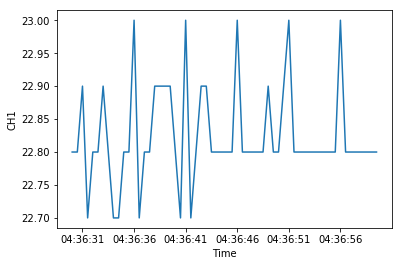

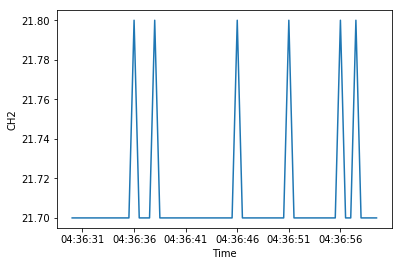

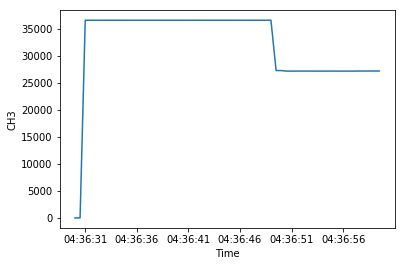

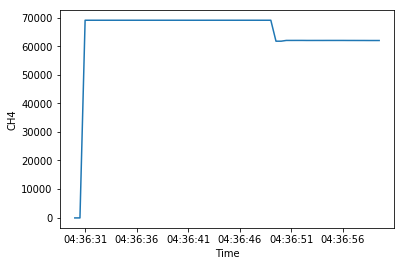

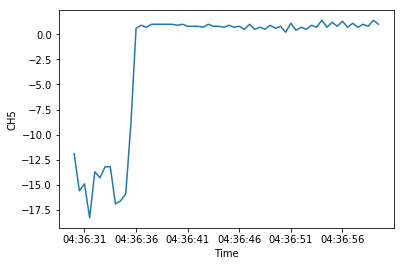

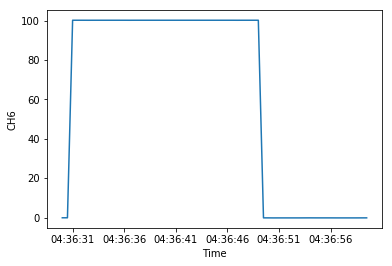

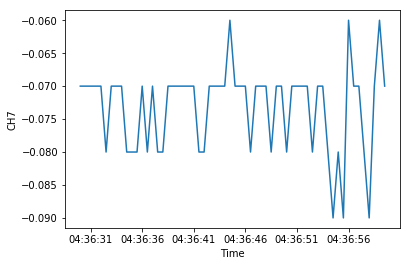

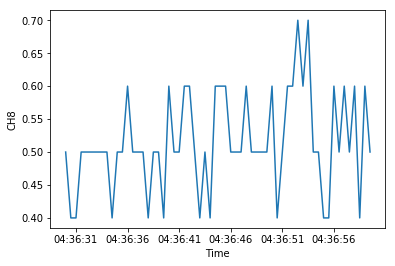

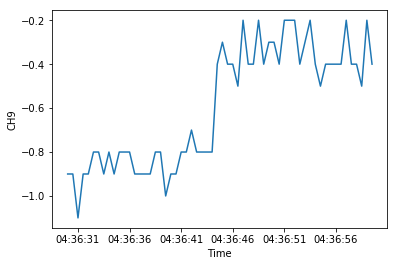

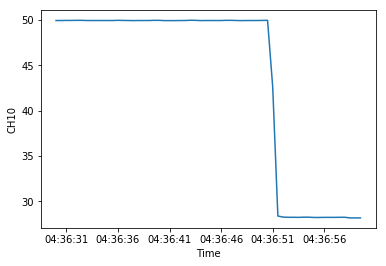

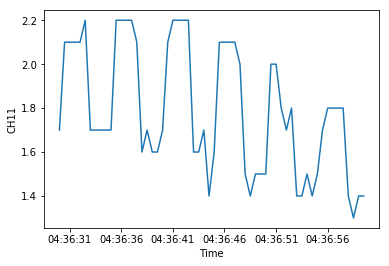

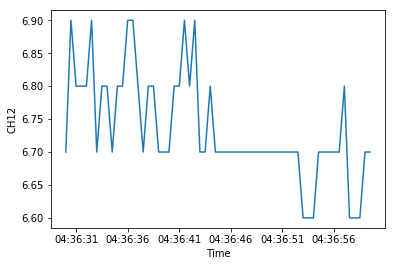

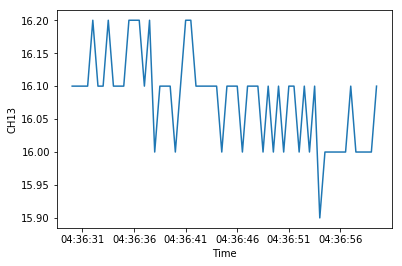

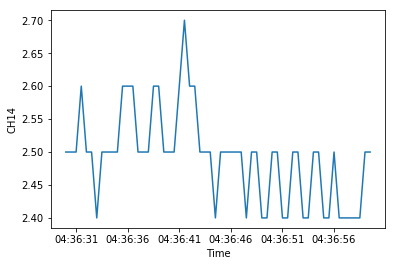

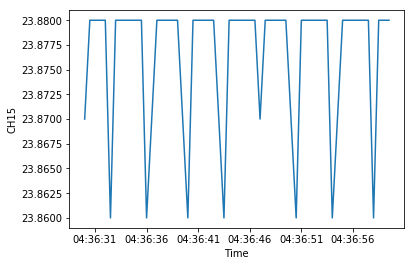

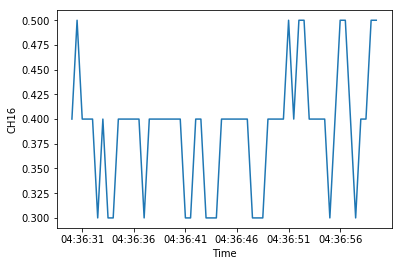

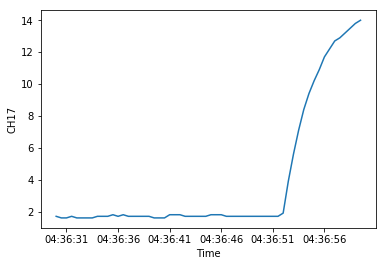

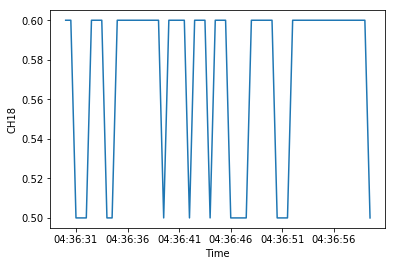

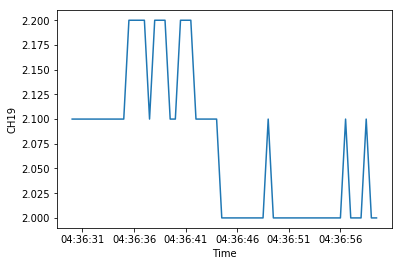

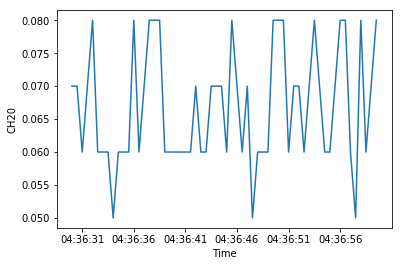

In [9]:
for i in range(1, 21):
    plt.figure(i)
    ime = "CH" + str(i)
    plt.ylabel(ime)
    plt.xlabel("Time")
    plt.plot(df_p[ime]);
    plt.show();
    
    plt.savefig(ime)

# Calculating offsets and converting data with given equation

In [10]:
# Making dict of offsets

dict_offset = dict()

for i, mean in enumerate(df_p.mean()):
    dict_offset ["CH" + str(i - 1)] = mean

In [11]:
#Calculating easch sensor. At first we create new dataframe (copy of original dataframe).

df_calc = pd.DataFrame(df)[:].copy(deep=True)

df_calc["CH3"] = round(4.0325 - df["CH3"] / 1000000, 8)
df_calc["CH4"] = round(49.285 - df["CH4"] / 1000000, 8)

#Mistake in equation image?
df_calc["CH6"] = abs(round(df["CH6"], 1))

df_calc["CH7"] = df["CH7"] - dict_offset["CH7"]
df_calc["CH8"] = (df["CH8"] - dict_offset["CH8"]) * 1.159
df_calc["CH9"] = (df["CH9"] - dict_offset["CH9"]) * 1.159
df_calc["CH10"] = df["CH10"] * 20
df_calc["CH11"] = round(df["CH11"], 1) - dict_offset["CH11"]

# Calculating power

Here we can see which variables are same.

E_TCU = U_CAT x (I_TCU1 + I_TCU2)

E_TCU = CH17 * ( ?? + CH8)

No data for I_TCU1



E_RHEO = U_CAT x ( I_RHEO_11 + I_RHEO_12 + I_RHEO_21 + I_RHEO_22)

E_RHEO = CH17 * (CH14 + CH13 + CH12 + CH11)


E_HVAC_AC = U_HVAC_AC x (I_HVAC_AC1 + I_HVAC_AC2)

E_HVAC_AC = CH19 * (CH7 + CH20)


E_CVS = U_CAT x I_CVS

E_CVS = CH17 * CH18


E_total = E_TCU[1-2] + E_HVAC_DC + E_CVS


No data for E_HVAC_DC
E_HVAC_DC ...E_HVAC_AC


Ou

E_total_CAT = U_CAT + I_CAT

E_total_CAT = CH17 * CH16 

In [12]:
df_calc ["P_TCU"] = df_calc["CH17"] * (df_calc["CH8"]) # Missing I_TCU1

In [13]:
df_calc ["P_RHEO"] = df_calc["CH17"] * (df_calc["CH14"] + df_calc["CH13"] + df_calc["CH12"] + df_calc["CH11"])

In [14]:
df_calc ["P_HVAC_AC"] =df_calc["CH19"] * (df_calc["CH7"] + df_calc["CH20"])

In [15]:
df_calc ["P_CSV"] = df_calc["CH17"] * df_calc["CH18"]

In [16]:
df_calc ["P_total_CAT_1"] =  df_calc["P_TCU"] + df_calc["P_HVAC_AC"] + df_calc["P_CSV"]

In [17]:
df_calc ["P_total_CAT_2"] =  df_calc["CH17"] * df_calc["CH16"]

# Drawing graphs of power 

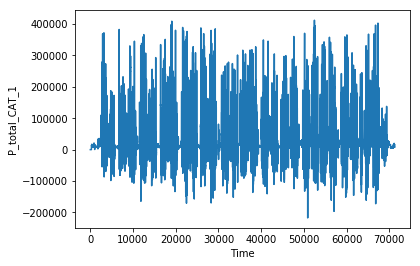

In [18]:
plt.figure(1)
plt.xlabel("Time")
plt.ylabel("P_total_CAT_1")
plt.plot(df_calc["P_total_CAT_1"])
plt.show()

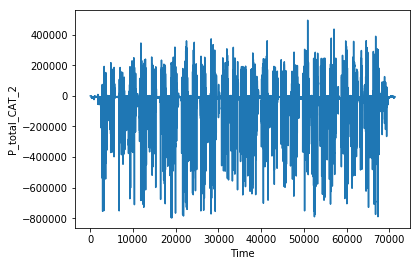

In [19]:
plt.figure(1)
plt.xlabel("Time")
plt.ylabel("P_total_CAT_2")
plt.plot(df_calc["P_total_CAT_2"])
plt.show()